In [1]:
%load_ext autoreload

In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#from monetio.models import hysplit

In [3]:
from monetio.models import hysplit

In [4]:
from utilvolc import volcat
import utilvolc.ash_inverse as ai
from utilvolc import ashapp

In [5]:
from utilvolc.ashapp import ashinverse

In [6]:
os.chdir('/hysplit-users/alicec/projects/bezy/notebooks/')
projdir = os.getcwd().replace('notebooks','')

vloc = [160.587,55.978]
tag ='M'
ens = ['gep{:02d}'.format(x) for x in np.arange(1,31)]
ens.append('gec00')
#ens=['gep04','gep03']

#----------------------------------------------------------------
# locations and names of netcdf files with cdump output.
tdir = os.path.join(projdir,'data')
fnamelist  = ['xrfile.invbezy{}_{}.nc'.format(tag,x) for x in ens]
tdirlist = [tdir for x in ens]

#----------------------------------------------------------------
configdir = os.path.join(projdir,'RunM')
configfile = 'config.invbezy{}.txt'.format(tag)

#-----------------------------------------------------------------
# location of volcat files
vdir = os.path.join(projdir,'data','volcat')
# volcano id to locate
vid = 'v300250'
#-----------------------------------------------------------------
# Location of inverse algorithm output
#wpath = os.getcwd()
wdir = os.path.join(projdir,'RunM')
#print(wpath)
#cdir = '../Run{}/'.format(tag)
#wdir = '../Run{}/'.format(tag,tag)
#sdir = os.path.join(wdir,'RunM_1_2_3_4_TF')
name = 'out.dat'
name2 = 'out2.dat'
#------------------------------------------------------------------

# name to write emit-times file to.
emit_file_name = '{}emit_Run{}4.txt'.format(wdir,tag)
tcm_name_base = 'run{}zzz.tcm.txt'.format(tag)
figbase = 'Run{}4'.format(tag)

#-------------------------------------------------------------------
#

execdir = os.path.join(projdir,'Inverse_240')
hysplitdir = os.path.join(projdir,'hysplit')
#execdir = mdir+'/Inverse_'
print(execdir, hysplitdir)
print(vdir)
#

datadir = os.path.join(projdir, 'data')

/hysplit-users/alicec/projects/bezy/Inverse_240 /hysplit-users/alicec/projects/bezy/hysplit
/hysplit-users/alicec/projects/bezy/data/volcat


In [7]:
%autoreload
#time list to prepare.
# start with one hour after eruption. 21:00-22:00
dlist = []
sdate = datetime.datetime(2020,10,21,21,0)
#sdate = datetime.datetime(2020,10,22,12,0)
dt = datetime.timedelta(hours=1)
for iii in np.arange(0,16):
    drange = [sdate, sdate+dt]
    dlist.append(drange)
    sdate += dt
print(dlist[0])
print(dlist[-1])

[datetime.datetime(2020, 10, 21, 21, 0), datetime.datetime(2020, 10, 21, 22, 0)]
[datetime.datetime(2020, 10, 22, 12, 0), datetime.datetime(2020, 10, 22, 13, 0)]


In [8]:
configfile

'config.invbezyM.txt'

In [9]:
# initiate the InverseAshEns object
%autoreload
inverse = ai.InverseAshEns(tdirlist,fnamelist,vdir,vid,configdir=configdir,configfile=configfile,verbose=False)
print('done')

done


In [10]:
inverse.invlist[1].inp

{'HYSPLIT_DIR': '/hysplit-users/alicec/FBamcArea/',
 'MAP_DIR': '/hysplit-users/alicec/hysplit.v5.0.0/graphics/',
 'WORK_DIR': '/hysplit-users/alicec/tmp/RunM/',
 'CONVERT_EXE': 'convert',
 'PYTHON_EXE': '/hysplit-users/alicec/anaconda3/envs/hysplit/bin/python',
 'forecastDirectory': '/hysplit-users/alicec/gefsnew/',
 'archivesDirectory': '/hysplit-users/alicec/gefsnew/',
 'GHOSTSCRIPT_EXE': 'gs',
 'DATA_DIR': '/hysplit-users/alicec/utilhysplit/utilvolc/ashapp/',
 'owner': 'A. Person',
 'VolcanoName': 'Bezymianny',
 'area': 785000.0,
 'top': 12880.0,
 'bottom': 2880.0,
 'start_date': datetime.datetime(2020, 10, 21, 19, 0),
 'durationOfSimulation': 12.0,
 'testminutes': 0.0,
 'emissionHours': 7.0,
 'meteorologicalData': 'GEFS',
 'EruptionSize': 0.0,
 'latitude': 55.978,
 'longitude': 160.587,
 'samplingIntervalHours': 1.0,
 'eflag': 0.0,
 'source_type': 'uniform',
 'jobname': 'ashtest',
 'runflag': 'inverse',
 'gisOption': 3,
 'zoomFactor': 50,
 'generatingPostscript': True,
 'generatin

In [11]:
inverse.invlist[13].cdump.ens.values

array(['102119_2880', '102119_3880', '102119_4880', '102119_5880',
       '102119_6880', '102119_7880', '102119_8880', '102119_9880',
       '102119_10880', '102119_11880', '102119_12880', '102120_2880',
       '102120_3880', '102120_4880', '102120_5880', '102120_6880',
       '102120_7880', '102120_8880', '102120_9880', '102120_10880',
       '102120_11880', '102120_12880', '102121_2880', '102121_3880',
       '102121_4880', '102121_5880', '102121_6880', '102121_7880',
       '102121_8880', '102121_9880', '102121_10880', '102121_11880',
       '102121_12880', '102122_2880', '102122_3880', '102122_4880',
       '102122_5880', '102122_6880', '102122_7880', '102122_8880',
       '102122_9880', '102122_10880', '102122_11880', '102122_12880',
       '102123_2880', '102123_3880', '102123_4880', '102123_5880',
       '102123_6880', '102123_7880', '102123_8880', '102123_9880',
       '102123_10880', '102123_11880', '102123_12880', '102200_2880',
       '102200_3880', '102200_4880', '102200_58

In [12]:
%autoreload
inverse.set_directory(wdir,execdir,datadir,hysplitdir)
inverse.print_directories()

Working directory, wdir :/hysplit-users/alicec/projects/bezy/RunM
execdir :/hysplit-users/alicec/projects/bezy/Inverse_240
hysplitdir :/hysplit-users/alicec/projects/bezy/hysplit
subdir :/hysplit-users/alicec/projects/bezy/RunM
vdir :/hysplit-users/alicec/projects/bezy/data/volcat
datadir :/hysplit-users/alicec/projects/bezy/data


In [13]:
# add in the relavant VOLCAT observations
%autoreload
#dlist = [[datetime.datetime(2020,10,22,9),datetime.datetime(2020,10,22,10)]]
for drange in dlist:
    print(drange)
    inverse.prepare_one_time(drange)

[datetime.datetime(2020, 10, 21, 21, 0), datetime.datetime(2020, 10, 21, 22, 0)]
[datetime.datetime(2020, 10, 21, 22, 0), datetime.datetime(2020, 10, 21, 23, 0)]
[datetime.datetime(2020, 10, 21, 23, 0), datetime.datetime(2020, 10, 22, 0, 0)]
[datetime.datetime(2020, 10, 22, 0, 0), datetime.datetime(2020, 10, 22, 1, 0)]
[datetime.datetime(2020, 10, 22, 1, 0), datetime.datetime(2020, 10, 22, 2, 0)]
[datetime.datetime(2020, 10, 22, 2, 0), datetime.datetime(2020, 10, 22, 3, 0)]
[datetime.datetime(2020, 10, 22, 3, 0), datetime.datetime(2020, 10, 22, 4, 0)]
[datetime.datetime(2020, 10, 22, 4, 0), datetime.datetime(2020, 10, 22, 5, 0)]
[datetime.datetime(2020, 10, 22, 5, 0), datetime.datetime(2020, 10, 22, 6, 0)]
[datetime.datetime(2020, 10, 22, 6, 0), datetime.datetime(2020, 10, 22, 7, 0)]
[datetime.datetime(2020, 10, 22, 7, 0), datetime.datetime(2020, 10, 22, 8, 0)]
[datetime.datetime(2020, 10, 22, 8, 0), datetime.datetime(2020, 10, 22, 9, 0)]
[datetime.datetime(2020, 10, 22, 9, 0), datetim

In [14]:
%autoreload
inverse.invlist[0].print_summary()

Observations availalbe in volcat_avg_hash
dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])
times in cdump file
2020 10 21 19:00z
2020 10 21 20:00z
2020 10 21 21:00z
2020 10 21 22:00z
2020 10 21 23:00z
2020 10 22 00:00z
2020 10 22 01:00z
2020 10 22 02:00z
2020 10 22 03:00z
2020 10 22 04:00z
2020 10 22 05:00z
2020 10 22 06:00z
2020 10 22 07:00z
2020 10 22 08:00z
2020 10 22 09:00z
2020 10 22 10:00z
2020 10 22 11:00z
2020 10 22 12:00z


3 gep01
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


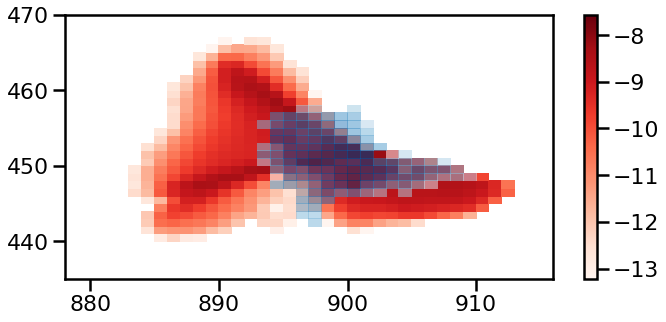

3 gep02
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


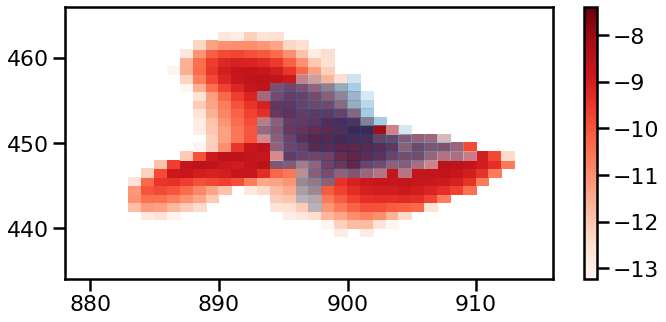

3 gep03
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


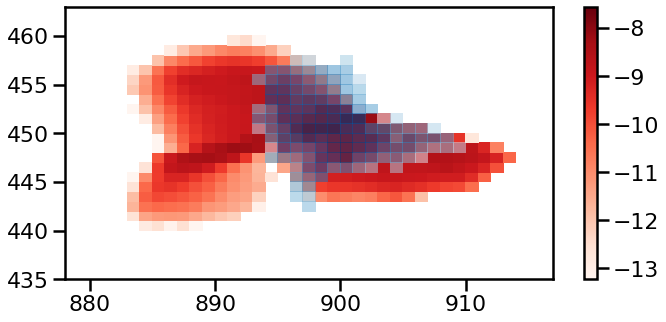

3 gep04
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


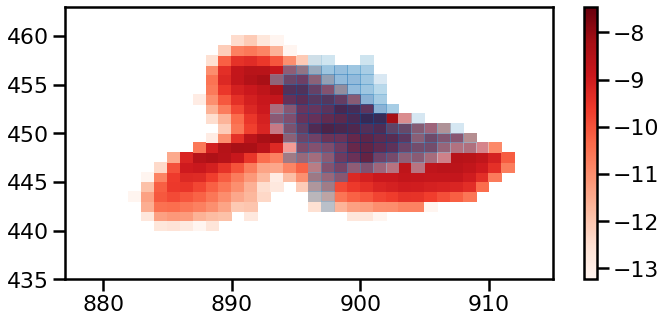

3 gep05
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


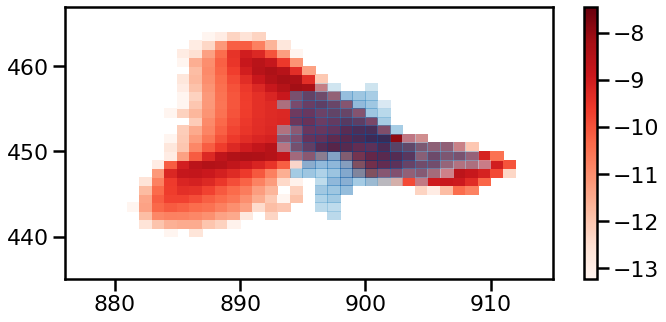

3 gep06
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


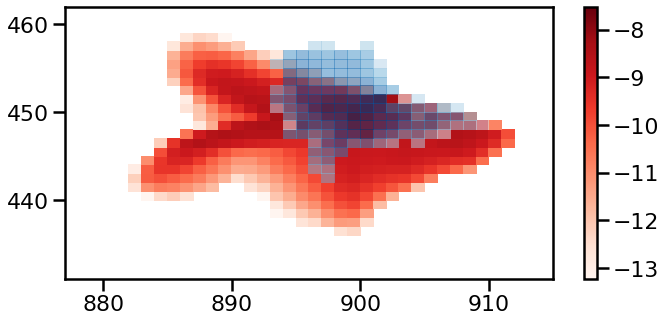

3 gep07
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


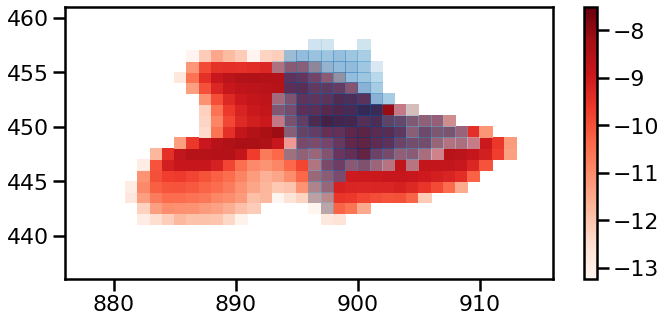

3 gep08
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


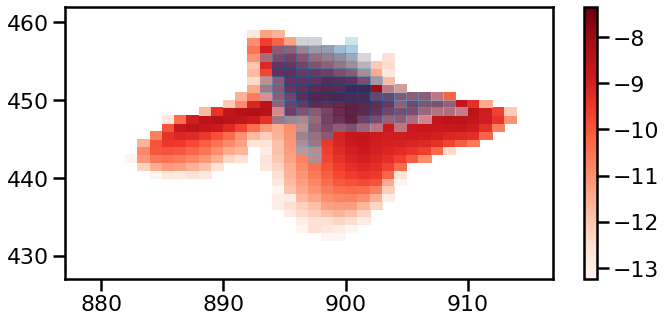

3 gep09
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


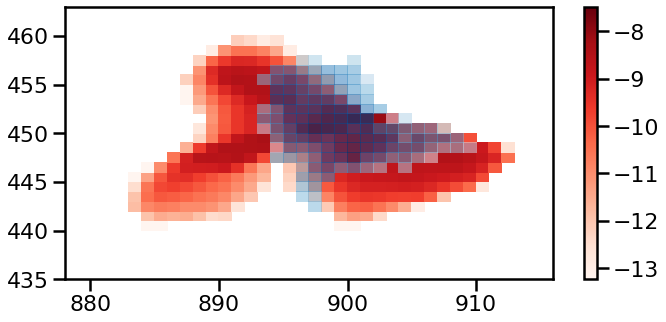

3 gep10
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


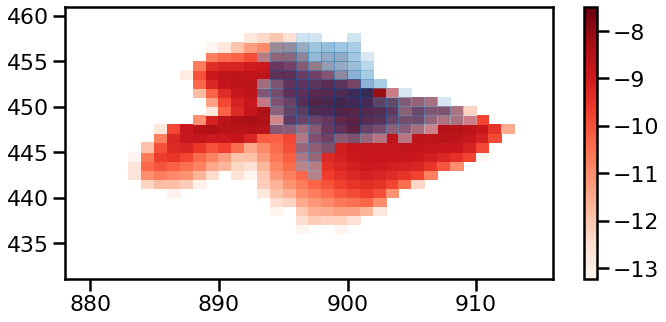

3 gep11
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


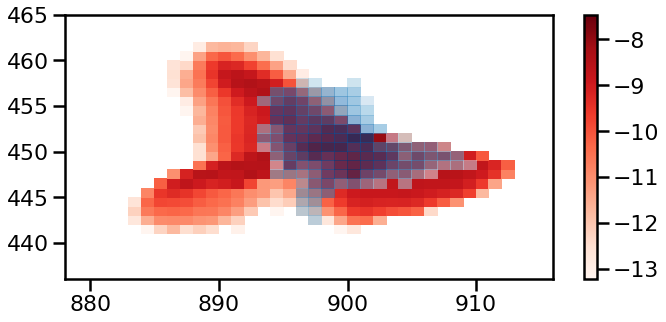

3 gep12
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


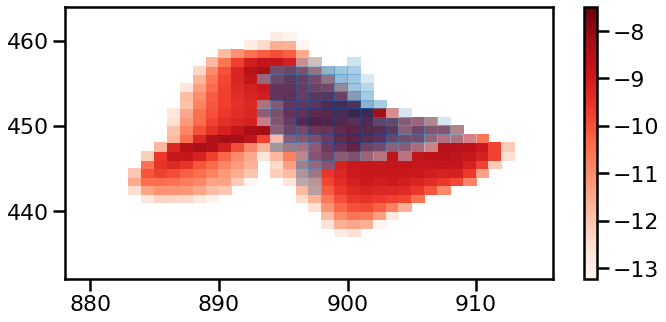

3 gep13
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


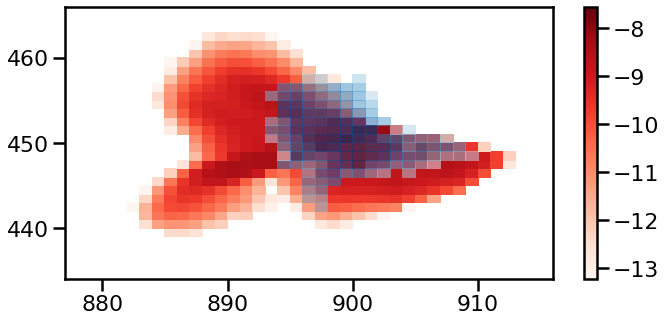

3 gep14
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


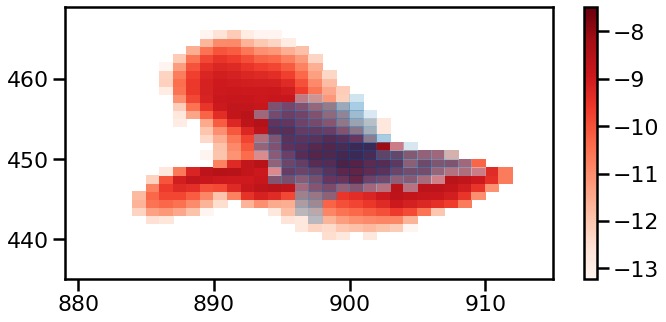

3 gep15
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


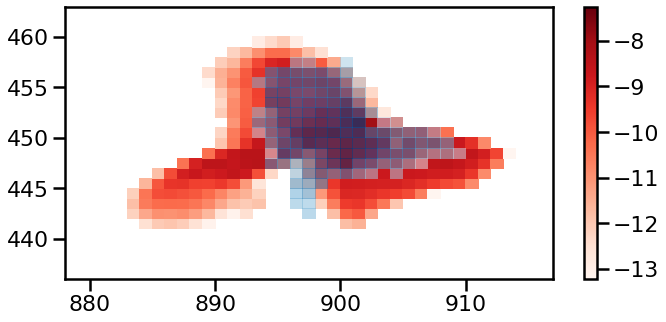

3 gep16
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


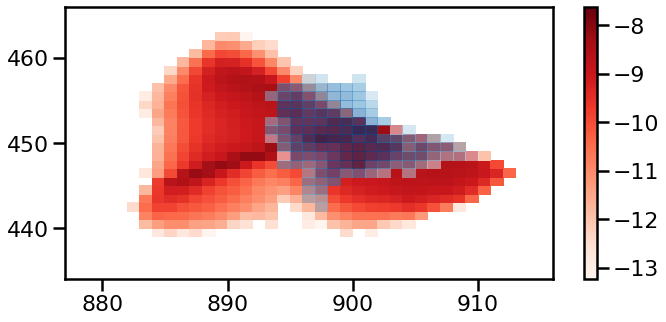

3 gep17
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


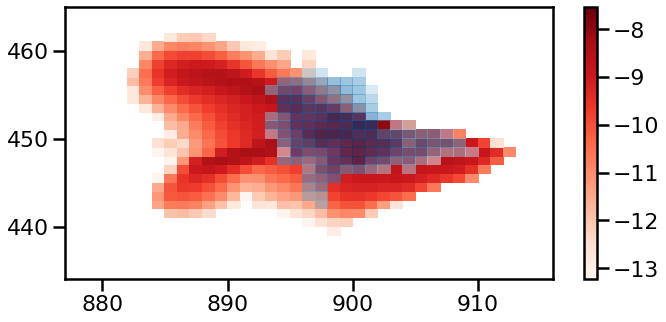

3 gep18
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


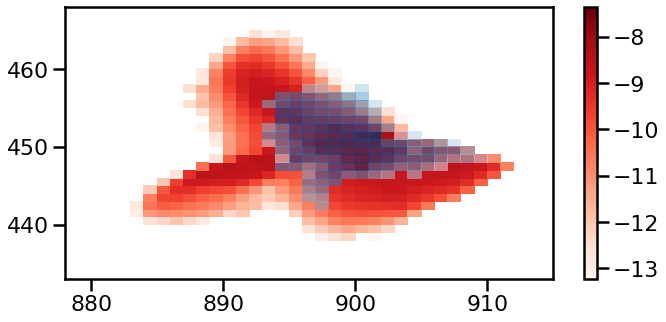

3 gep19
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


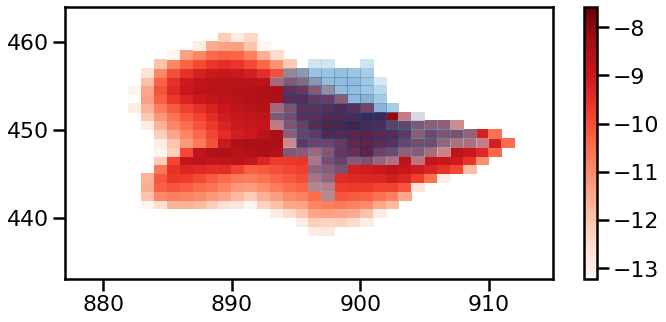

3 gep20
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


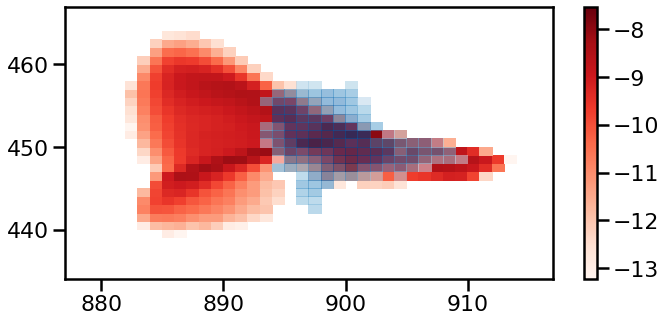

3 gep21
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


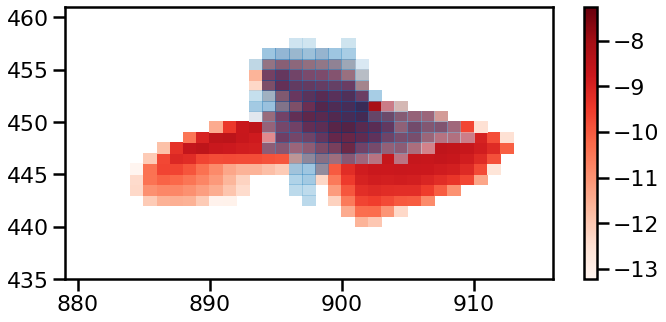

3 gep22
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


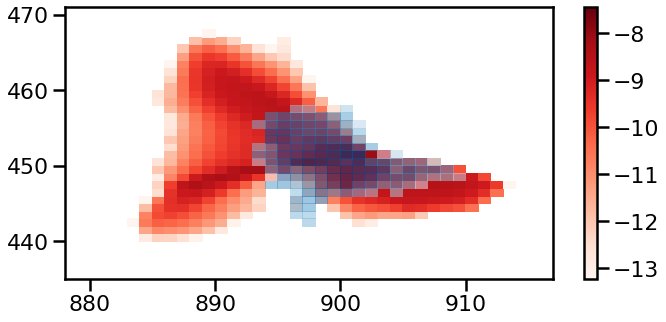

3 gep23
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


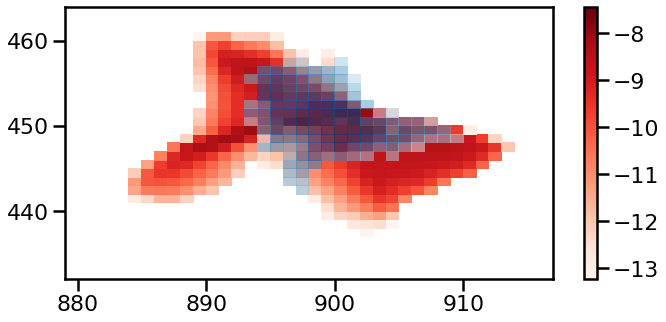

3 gep24
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


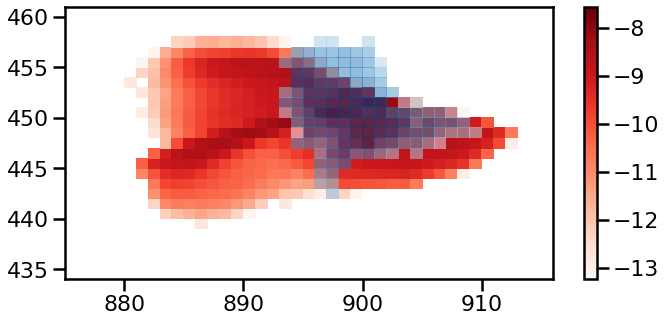

3 gep25
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


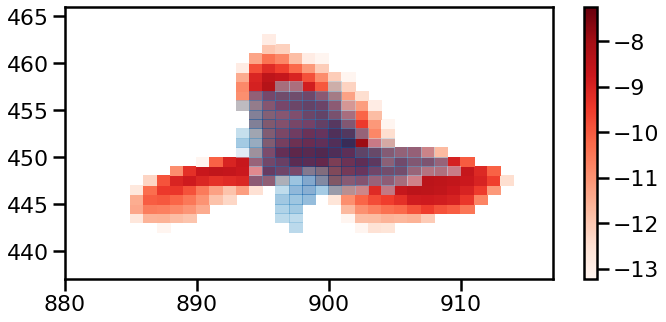

3 gep26
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


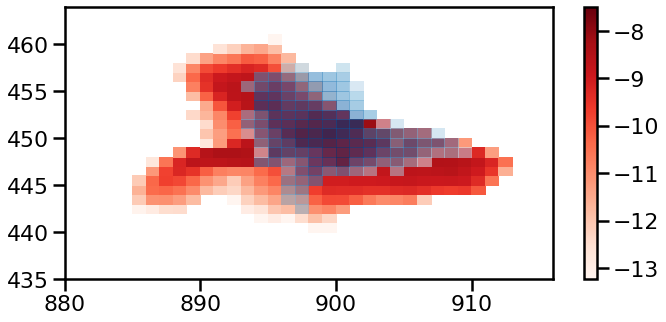

3 gep27
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


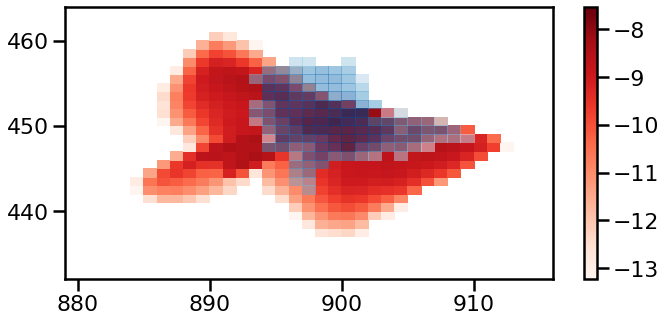

3 gep28
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


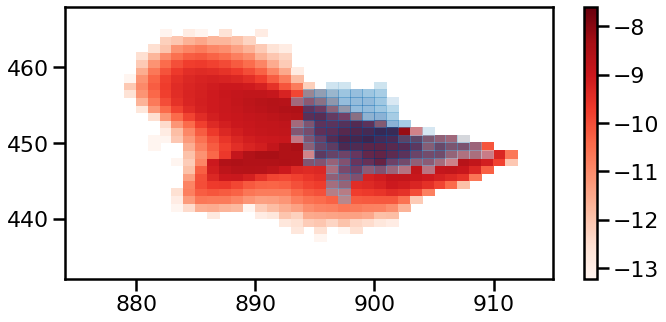

3 gep29
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


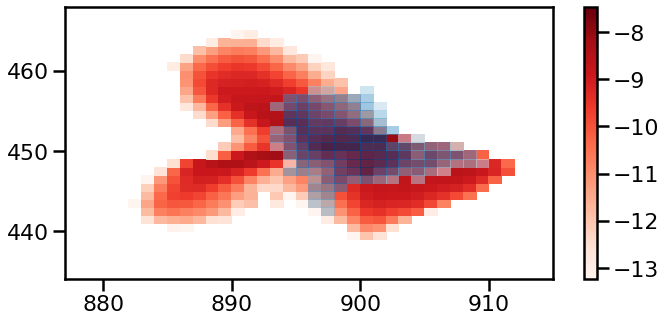

3 gep30
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


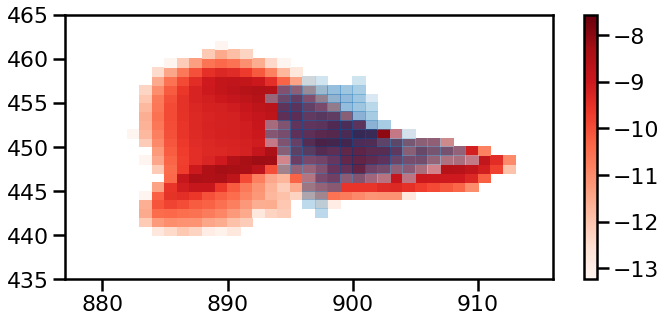

3 gec00
tii 3


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


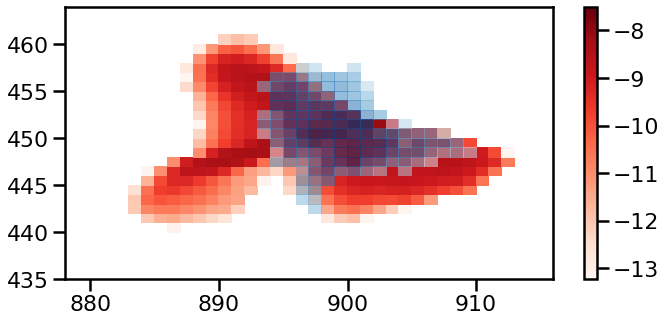

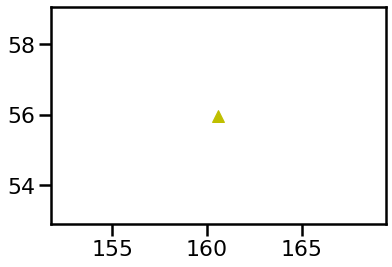

In [15]:
%autoreload
#gep10, gep16 looks good at tii=6.
#gep24 possibly looks ok.
zlevel=None  #index of vertical level to show.
           # if None then sum along the z index.
#zlevel=20
tii=3
%autoreload
clist =[]
clist = inverse.compare_plotsA(daterange=dlist[0],tii=tii,zii=zlevel,vloc=None)
plt.plot(160.587,55.978,'y^')


In [16]:
%autoreload
inverse.set_concmult(1)

In [17]:
def makerun(tii,remove_cols, remove_rows, remove_sources,remove_ncs):
    #print("HERE HERE HERE")
    inverse.make_tcm_mult(tii,remove_cols=remove_cols, remove_rows=remove_rows, remove_sources=remove_sources,remove_ncs=remove_ncs)
    runtag = ai.create_runtag(tag,tii,remove_cols, remove_rows, remove_sources,remove_ncs=remove_ncs)
    inverse.set_subdirectory(runtag)
    #print('HERE', inverse.subdir)
    tcmstr = inverse.write_tcm(os.path.join(inverse.subdir, tcm_name_base.replace('zzz','4')))
    inverse.run_tcm()
    
    eii=None
    unit='g/h'
    unit='kg/s'
    inverse.plot_outdat_ts(eii,unit=unit)
    #plt.show()
    #inverse.plot_outdat_ts(eii,profile=True)
#    print('saving emissions {}.csv'.format(runtag))
#inverse.save_emis(runtag+'.csv')


In [18]:
%autoreload
configdir='/hysplit-users/alicec/projects/bezy/RunM/'
configfile = 'config.invbezyM.txt'
inverse.add_config_info(configdir, configfile)

In [19]:
inverse.invlist[0].cdump.ens.values

array(['102119_2880', '102119_3880', '102119_4880', '102119_5880',
       '102119_6880', '102119_7880', '102119_8880', '102119_9880',
       '102119_10880', '102119_11880', '102119_12880', '102120_2880',
       '102120_3880', '102120_4880', '102120_5880', '102120_6880',
       '102120_7880', '102120_8880', '102120_9880', '102120_10880',
       '102120_11880', '102120_12880', '102121_2880', '102121_3880',
       '102121_4880', '102121_5880', '102121_6880', '102121_7880',
       '102121_8880', '102121_9880', '102121_10880', '102121_11880',
       '102121_12880', '102122_2880', '102122_3880', '102122_4880',
       '102122_5880', '102122_6880', '102122_7880', '102122_8880',
       '102122_9880', '102122_10880', '102122_11880', '102122_12880',
       '102123_2880', '102123_3880', '102123_4880', '102123_5880',
       '102123_6880', '102123_7880', '102123_8880', '102123_9880',
       '102123_10880', '102123_11880', '102123_12880', '102200_2880',
       '102200_3880', '102200_4880', '102200_58

In [20]:
inverse.invlist[0].sourcehash.keys()

dict_keys(['102119_2880', '102119_3880', '102119_4880', '102119_5880', '102119_6880', '102119_7880', '102119_8880', '102119_9880', '102119_10880', '102119_11880', '102119_12880', '102120_2880', '102120_3880', '102120_4880', '102120_5880', '102120_6880', '102120_7880', '102120_8880', '102120_9880', '102120_10880', '102120_11880', '102120_12880', '102121_2880', '102121_3880', '102121_4880', '102121_5880', '102121_6880', '102121_7880', '102121_8880', '102121_9880', '102121_10880', '102121_11880', '102121_12880', '102122_2880', '102122_3880', '102122_4880', '102122_5880', '102122_6880', '102122_7880', '102122_8880', '102122_9880', '102122_10880', '102122_11880', '102122_12880', '102123_2880', '102123_3880', '102123_4880', '102123_5880', '102123_6880', '102123_7880', '102123_8880', '102123_9880', '102123_10880', '102123_11880', '102123_12880', '102200_2880', '102200_3880', '102200_4880', '102200_5880', '102200_6880', '102200_7880', '102200_8880', '102200_9880', '102200_10880', '102200_11880

In [21]:
inverse.invlist[0].inp['forecastDirectory']

'/hysplit-users/alicec/gefsnew/'

tii [2, 3, 4]
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000

/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1092: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1093: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this,

2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21

AttributeError: 'NoneType' object has no attribute 'keys'

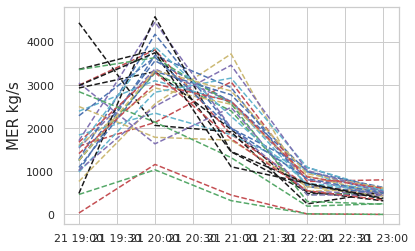

In [23]:
%autoreload
# creates emit-times, CONTROL and SETUP files for HYSPLIT runs.
# Note that warning that meteorological files not found is ok.

%autoreload

tiilist = [[2,3],[2,3,4],[2,3,4,5],[2,3,4,5,6],[2,3,4,5,6,7],[2,3,4,5,6,7,8],[2,3,4,5,6,7,8,9],
           [2,3,4,5,6,7,8,9,10],[2,3,4,5,6,7,8,9,10,11]]  #times to assimilate in inversion algorithm.
tiilist = [[2,3,4]]
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=7
for tii in tiilist:
    print('tii', tii)
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
    inverse.make_efile(vloc=vloc)
    inverse.run_hysplit()
    inverse.set_subdirectory(runtag)
    runtag = ai.create_runtag(tag,tii,remove_cols, remove_rows, remove_sources,remove_ncs)
    inverse.set_subdirectory(runtag)
    dset = inverse.create_emit_output('RunM4.nc')

In [ ]:
%autoreload
#for eii in np.arange(0,3):
inverse.save_emis(savename='emis.csv',eii=None)

In [ ]:
%autoreload
tiilist = [2,3,4]  #times to assimilate in inversion algorithm.
remove_cols=True
remove_rows=False
remove_ncs=7
#remove_sources = None
remove_sources = None  # this would remove top vertical level from consideration.
#inverse.make_tcm_mult([1,2,3,4],remove_cols=True,remove_rows=False,remove_sources=['12880'])
inverse.make_tcm_mult(tiilist,remove_cols=remove_cols, remove_rows=remove_rows, remove_sources=remove_sources,remove_ncs=remove_ncs)
runtag = ai.create_runtag(tag,tiilist,remove_cols, remove_rows, remove_sources,remove_ncs)

# set the subdirectory for this TCM run.
#subdir = inverse.set_sub_directory(runtag)
#print('setting subdirectory {}'.format(subdir))

In [ ]:
inverse.save_emis(savename='emis.csv',eii=None)

In [ ]:
print(runtag)

In [ ]:
%autoreload
inverse.plot_tcm()



In [ ]:
t0 = inverse.invlist[0].tcm
t1 = inverse.invlist[1].tcm
print(len(inverse.invlist[0].tcm_columns))
print(len(inverse.invlist[1].tcm_columns))

In [ ]:
#hysplitdir = '/hysplit-users/alicec/FBamcArea/exec/'
#inverse.set_directory(wdir,execdir,hysplitdir)
inverse.set_subdirectory(runtag)

In [ ]:
%autoreload
tcmstr = inverse.write_tcm(os.path.join(inverse.subdir, tcm_name_base.replace('zzz','4')))
#print(tcmstr)

In [ ]:
%autoreload
#hysplitdir = '/hysplit-users/alicec/FBamcArea/exec/'
#inverse.set_directory(wdir,execdir,hysplitdir)
inverse.run_tcm()

In [ ]:
# Now run the inverse model.

# open the Parameters_in.dat file and set N_ctrl, Nx_ctrl and lbfgs_nbd to
# the number shown for N_ctrl above.

# copy the tcm file to TCM_sum.csv

# run new_lbfgsb.x

In [ ]:
%autoreload
inverse.plot_outdat(eii=None)

In [ ]:
%autoreload
print('Data assimilated over')
for tii in tiilist:
    print(inverse.invlist[0].get_time(tii))
eii=[3]
eii=None
unit='g/h'
unit='kg/s'
inverse.plot_outdat_ts(eii,unit=unit)
plt.show()
inverse.plot_outdat_ts(eii,unit=unit,profile=True)
#ax = plt.gca()
#ax.set_ylim(0,10000)

In [ ]:
inverse.invlist[0].sourcehash

In [ ]:
#%autoreload
#inverse.sourcehash = ai.get_sourcehash(configdir,configfile)

In [ ]:
%autoreload
unit='kg/s'
#unit='g/h'
iii=15
print(inverse.taglist[iii])
ilist =  inverse.read_outdat()
df = ilist[iii].get_emis()
vals = inverse.invlist[iii].make_outdat(df)
inverse.invlist[iii].plot_outdat(vals,log=False,cmap='viridis',unit=unit)
#plt.savefig('{}.emissions_log.png'.format(figbase))
plt.show()
inverse.invlist[0].plot_outdat(vals,log=True,cmap='viridis',unit=unit)
#plt.savefig('{}.emissions.png'.format(figbase))


In [ ]:
%autoreload
inverse.print_directories()

In [ ]:
%autoreload
configdir='/hysplit-users/alicec/projects/bezy/RunM/'
configfile = 'config.invbezyM.txt'
inverse.add_config_info(configdir, configfile)

In [ ]:
inverse.invlist[0].inp['forecastDirectory']

In [ ]:
%autoreload
# creates emit-time:q
#s, CONTROL and SETUP files for HYSPLIT runs.
inverse.make_efile(vloc=vloc)

In [ ]:
60*6000 / 3600

In [ ]:
%autoreload
inverse.run_hysplit()

In [ ]:
%autoreload
inverse.set_subdirectory(runtag)
dset = inverse.create_emit_output('RunM4.nc')

In [ ]:
dset

In [ ]:
for attr in dset.attrs: print(type(dset.attrs[attr]), attr)

In [ ]:
%autoreload
from utilvolc import basic_checks
dset3 = ai.update_attrs_for_netcdf(dset)

In [ ]:
dset

In [ ]:
dset2.to_netcdf('test.nc')

In [ ]:
x = 2 #pg/m3
# 50,000 particles 0.25x0.25 degrees. 100m vertical. 3h time average.
emission = 6.933e4 #g/h
